In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [167]:
data = pd.read_csv("BSDS_November.csv")

In [168]:
data.head()

,gender,Partner,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,DSL,Yes,Two year,Mailed check,39.70,692.35,No
1,Male,No,Yes,DSL,No,Month-to-month,Bank transfer (automatic),46.05,80.35,Yes
2,Male,Yes,Yes,Fiber optic,Yes,Month-to-month,Electronic check,91.80,5960.5,No
3,Male,Yes,Yes,No,No internet service,One year,Credit card (automatic),19.80,576.65,No
4,Male,Yes,Yes,Fiber optic,Yes,One year,Bank transfer (automatic),89.45,5692.65,No


# Preprocessing

We noticed that some of the columns are incomplete, they do not have the Total Charges values. 

In [169]:
data[data['TotalCharges'] == ' ']

,gender,Partner,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
71,Female,Yes,No,DSL,Yes,Two year,Credit card (automatic),56.05,,No
2208,Male,Yes,Yes,No,No internet service,Two year,Mailed check,25.35,,No
2523,Male,Yes,Yes,No,No internet service,One year,Mailed check,19.70,,No
2692,Male,Yes,Yes,No,No internet service,Two year,Mailed check,19.85,,No
3763,Female,Yes,Yes,DSL,Yes,Two year,Mailed check,80.85,,No
4812,Male,No,Yes,No,No internet service,Two year,Mailed check,20.25,,No
4819,Female,Yes,Yes,No,No internet service,Two year,Mailed check,20.00,,No
5132,Female,Yes,No,DSL,Yes,Two year,Bank transfer (automatic),52.55,,No
5388,Male,Yes,Yes,No,No internet service,Two year,Mailed check,25.75,,No


We have then decided to substitute those missing values with the median of the column.

In [170]:
filt = (data["TotalCharges"] == ' ')
median = data.loc[~filt,"TotalCharges"].astype('float').median()
data.loc[filt, "TotalCharges"] = str(median)
data["TotalCharges"] = data["TotalCharges"].astype('float')

In [171]:
data.describe()

,MonthlyCharges,TotalCharges
count,5423.000000,5423.000000
mean,64.776342,2290.462447
std,30.107733,2263.819322
min,18.250000,18.800000
25%,35.450000,411.675000
50%,70.450000,1404.200000
75%,89.875000,3807.675000
max,118.600000,8684.800000


## Feature engineering

We divided the features in three categories and transformed categorical and binary columns using encoders.

In [172]:
categorical_features = ['InternetService', 'PaymentMethod', 'OnlineSecurity']
numerical_features = ['MonthlyCharges', 'TotalCharges']
binary_features = ['gender', 'Partner', 'PhoneService', 'Contract']

In [173]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

encoder = OneHotEncoder(sparse=False)
ordinal_encoder = OrdinalEncoder()

cat_features = encoder.fit_transform(data[categorical_features])
bin_features = ordinal_encoder.fit_transform(data[binary_features])

columns = np.array(encoder.categories_)

binary_cols = np.array(binary_features)
num_cols = np.array(numerical_features)
columns = np.concatenate(tuple(columns))
all_columns = np.concatenate((binary_cols, columns, num_cols))
all_columns[6] = 'NoInternet'
all_columns[-3] = 'OnlineSecurity'
all_columns

array(['gender', 'Partner', 'PhoneService', 'Contract', 'DSL',
       'Fiber optic', 'NoInternet', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'No', 'No internet service', 'OnlineSecurity', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [174]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
labels = lab_encoder.fit_transform(data['Churn'])

In [175]:
num_features = data[numerical_features].to_numpy()

df = np.hstack((bin_features, cat_features, num_features))
frame = pd.DataFrame(df, columns = all_columns)
frame['Churn'] = labels
frame

,gender,Partner,PhoneService,Contract,DSL,Fiber optic,NoInternet,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,No,No internet service,OnlineSecurity,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39.70,692.35,0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,46.05,80.35,1
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,91.80,5960.50,0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,19.80,576.65,0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,89.45,5692.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,95.00,95.00,1
5419,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,91.10,2198.30,0
5420,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.15,306.05,0
5421,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,99.45,1200.15,1


Here we calculate the correlations between the variables, highlighting the correlation between each variable and 'Churn'

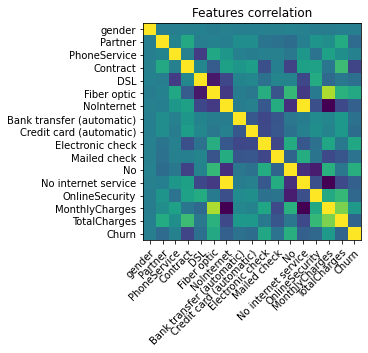

Correlation between features and churn: 
gender                      -0.009327
Partner                     -0.149204
PhoneService                 0.009064
Contract                    -0.392853
DSL                         -0.119299
Fiber optic                  0.300296
NoInternet                  -0.224051
Bank transfer (automatic)   -0.107766
Credit card (automatic)     -0.138025
Electronic check             0.296511
Mailed check                -0.091831
No                           0.339964
No internet service         -0.224051
OnlineSecurity              -0.171764
MonthlyCharges               0.187383
TotalCharges                -0.194419
Churn                        1.000000
Name: Churn, dtype: float64


In [176]:
def get_correlations(frame):
    correlations = np.corrcoef(frame, rowvar=False)
    n = correlations.shape[1]
    fig, ax = plt.subplots()
    im = ax.imshow(correlations)

    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))

    ax.set_xticklabels(frame.columns)
    ax.set_yticklabels(frame.columns)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.title('Features correlation')
    plt.show()
    
    correlations = pd.DataFrame(correlations, columns = frame.columns, index = frame.columns)
    print(f'Correlation between features and churn: \n{correlations["Churn"]}')
    return correlations

correlations = get_correlations(frame)

Since some of the columns have a really low correlation with respect to Churn we decided to drop them and to group the phone service and online security in one single column of added services. We also dropped No Internet Service because it is a repetition of No Internet. Moreover, we divided total charges by the monthly charges in order to have an estimate of the total time that clients spent with the company, represented by the variable 'Months'

In [177]:
noisy_columns = frame[['gender', 'No internet service', 'PhoneService', 'OnlineSecurity',
                       'Credit card (automatic)', 'Mailed check']]

frame['Bank transfer (automatic)'] = frame['Bank transfer (automatic)'] + frame['Credit card (automatic)']
frame.rename(columns={'Bank transfer (automatic)':'AutomaticPayment'}, inplace=True)
frame.rename(columns={'No': 'NoOnlineSecurity'}, inplace=True)
ads = frame['PhoneService'] + frame['OnlineSecurity']

time = frame['TotalCharges'] / frame['MonthlyCharges']
frame['TotalCharges'] = time
frame.rename(columns={'TotalCharges':'Months'}, inplace=True)

frame.drop(columns=noisy_columns, inplace=True)
frame['AddServices'] = ads

In [178]:
frame

,Partner,Contract,DSL,Fiber optic,NoInternet,AutomaticPayment,Electronic check,NoOnlineSecurity,MonthlyCharges,Months,Churn,AddServices
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,39.70,17.439547,0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,46.05,1.744843,1,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,91.80,64.929194,0,2.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,19.80,29.123737,0,1.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,89.45,63.640581,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5418,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,95.00,1.000000,1,2.0
5419,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,91.10,24.130626,0,2.0
5420,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.15,14.470449,0,1.0
5421,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,99.45,12.067873,1,1.0


## Outliers Detection

Here we define a function which evaluates the possible outliers and apply it in order to drop them, since they may harm our previsions.

In [179]:
def get_outliers(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    iqr = q3 - q1
    return s[(s > q3 + 1.5*iqr) | (s < q1 - 1.5*iqr)]

We looked for outliers considering specific combinations of features:

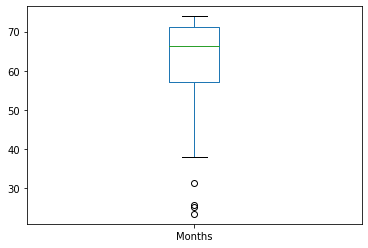

In [180]:
filt = (frame['Contract'] == 2.0)
filt2 = (frame['Fiber optic'] == 1.0)
filt4 = (frame['NoOnlineSecurity'] == 1.0)
frame[filt & filt2 & filt4]['Months'].plot.box()
plt.show()

In [181]:
to_drop = get_outliers(frame[filt & filt2 & filt4]['Months'])
frame.drop(to_drop.index, inplace=True)

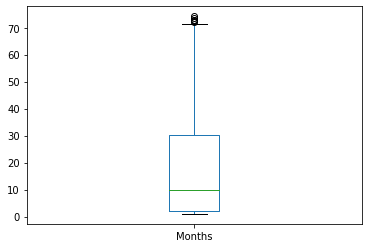

In [182]:
s = frame[(frame['Churn'] == 1.0)]['Months']
s.plot.box()
plt.show()

In [183]:
to_drop = get_outliers(s)
frame.drop(to_drop.index, inplace=True)

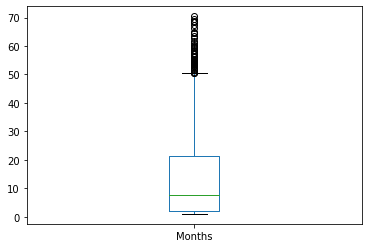

In [184]:
filt = (frame['Contract'] == 0.0)
s = frame[(frame['Churn'] == 1.0) & filt]['Months']
s.plot.box()
plt.show()

In [185]:
to_drop = get_outliers(s)
frame.drop(to_drop.index, inplace=True)

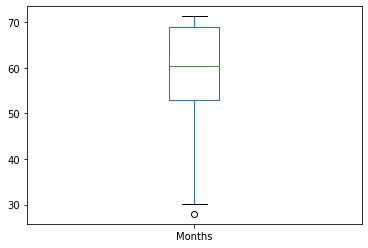

In [186]:
filt = (frame['Contract'] == 2.0)
frame[filt & (frame['Churn'] == 1.0)]['Months'].plot.box()
plt.show()

In [187]:
to_drop = get_outliers(frame[filt & (frame['Churn'] == 1.0)]['Months'])
frame.drop(to_drop.index, inplace=True)

# Models training

We separate labels from independent varibales:

In [188]:
labels = frame['Churn'].to_numpy()
frame.drop(columns=['Churn'], inplace=True)
df = frame.to_numpy()

This is the frame resulting from preprocessing, which will be used to train the algorithms

In [189]:
frame

,Partner,Contract,DSL,Fiber optic,NoInternet,AutomaticPayment,Electronic check,NoOnlineSecurity,MonthlyCharges,Months,AddServices
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,39.70,17.439547,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,46.05,1.744843,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,91.80,64.929194,2.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,19.80,29.123737,1.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,89.45,63.640581,2.0
...,...,...,...,...,...,...,...,...,...,...,...
5418,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,95.00,1.000000,2.0
5419,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,91.10,24.130626,2.0
5420,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.15,14.470449,1.0
5421,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,99.45,12.067873,1.0


We splitted the dataset in training set and test set for testing purposes

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, train_size=0.77, random_state=42)
print(f'Positive samples: {np.sum(y_train)}, Negative samples: {len(y_train)-np.sum(y_train)}')

Positive samples: 1054, Negative samples: 3073


We trained our models optimizing for the accuracy.
We trained logistic regression, xgboost, random forest, catboost and support vector machine. Our idea is to compare the algorithm and use the most accurate to make the final prediction. Hyperparameters tuning was done thorugh Grid Search.

### Logistic regression

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

logr = LogisticRegression(max_iter=1600, solver='liblinear', C=0.9191836734693877, class_weight=None)
logr.fit(X_train, y_train)
y_predicted = logr.predict(X_test)
matrix = confusion_matrix(y_test, y_predicted)

print(f'accuracy: {accuracy_score(y_test, y_predicted)}')
print(f'f1 score: {f1_score(y_test, y_predicted)}')
matrix

accuracy: 0.7907542579075426
f1 score: 0.5505226480836237


array([[817,  97],
       [161, 158]], dtype=int64)

### Xgboost

In [192]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=44, max_depth=4, min_child_weight=1e-05, gamma=3, learning_rate=0.08367510204081632)
xgb.fit(X_train, y_train)
y_predicted = xgb.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_predicted)}')
print(f'f1 score: {f1_score(y_test, y_predicted)}')
matrix = confusion_matrix(y_test, y_predicted)
matrix

accuracy: 0.8012976480129764
f1 score: 0.5632798573975045


array([[830,  84],
       [161, 158]], dtype=int64)

### Catboost

In [193]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(silent=True, train_dir='logloss', learning_rate=0.006210526315789474, depth=9)
cbc.fit(X_train, y_train)
y_predicted = cbc.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_predicted)}')
print(f'f1 score: {f1_score(y_test, y_predicted)}')
matrix = confusion_matrix(y_test, y_predicted)
matrix

accuracy: 0.7988645579886455
f1 score: 0.5738831615120275


array([[818,  96],
       [152, 167]], dtype=int64)

### Random forest

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rndfrst = RandomForestClassifier(n_estimators = 64,
                                 min_samples_split = 10,
                                 max_leaf_nodes = 49,
                                 max_features = 0.5,
                                 max_depth = 16,
                                 bootstrap= True)

rndfrst.fit(X_train, y_train)
rf_predictions = rndfrst.predict(X_test)
rf_probs = rndfrst.predict_proba(X_test)[:, 1]


matrix = confusion_matrix(y_test, rf_predictions)
print(f"roc_value = {roc_auc_score(y_test, rf_probs)}")
print(f'accuracy: {accuracy_score(y_test, rf_predictions)}')
print(f'f1 score: {f1_score(y_test, rf_predictions)}')
matrix

roc_value = 0.8462355007099592
accuracy: 0.797242497972425
f1 score: 0.5614035087719298


array([[823,  91],
       [159, 160]], dtype=int64)

### Support vector machine

In [195]:
from sklearn.svm import SVC

svc = SVC(C=0.8428947368421053)
xgb.fit(X_train, y_train)
y_predicted = xgb.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_predicted)}')
print(f'f1 score: {f1_score(y_test, y_predicted)}')
matrix = confusion_matrix(y_test, y_predicted)
matrix

accuracy: 0.8012976480129764
f1 score: 0.5632798573975045


array([[830,  84],
       [161, 158]], dtype=int64)

## Models evaluation

In [196]:
classifiers = [logr, xgb, cbc, rndfrst]

Here is a summary of the accuracy achieved on the test set:

In [197]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    print(f'{classifier.__class__.__name__}: {accuracy_score(y_test, y_predicted)}')

LogisticRegression: 0.7907542579075426
XGBClassifier: 0.8012976480129764
CatBoostClassifier: 0.7988645579886455
RandomForestClassifier: 0.7988645579886455


In order to better evaluate our models' accuracy, we decided to use cross validation on our training set

In [198]:
from sklearn.model_selection import cross_val_score

def get_cross_val(classifiers, X_train, y_train):
    for classifier in classifiers:
        accuracy = cross_val_score(classifier, X_train, y_train)
        print(f'{classifier.__class__.__name__}: {accuracy}, avg: {np.mean(accuracy)}')

In [199]:
get_cross_val(classifiers, X_train, y_train)

LogisticRegression: [0.81961259 0.79903148 0.82181818 0.80484848 0.80727273], avg: 0.8105166923472009
XGBClassifier: [0.82324455 0.80387409 0.82181818 0.80484848 0.80848485], avg: 0.8124540318438622
CatBoostClassifier: [0.81840194 0.8062954  0.80969697 0.80242424 0.80363636], avg: 0.8080909824638637
RandomForestClassifier: [0.81961259 0.80508475 0.80727273 0.80242424 0.81090909], avg: 0.8090606794335606


# Final classifier

We decided to opt for xgboost. The function classifier() will take the test set with no labels as argument and run the whole pipeline on it. The output is going to be the predicted classes. The auxiliary function feat_eng() performs the feature engineering process described above. This time, the model is going to be trained on the whole training set.

In [200]:
def classifier(test):
    xgb = XGBClassifier(n_estimators=44, max_depth=4, min_child_weight=1e-05, gamma=3, learning_rate=0.08367510204081632)
    xgb.fit(df,labels)
    
    df_test = feat_eng(test)
    predicted = xgb.predict(df_test)

    return predicted


def feat_eng(frame): 

    categorical_features = ['InternetService', 'PaymentMethod', 'OnlineSecurity']
    numerical_features = ['MonthlyCharges', 'TotalCharges']
    binary_features = ['gender', 'Partner', 'PhoneService', 'Contract']
    
    cat_features = encoder.fit_transform(data[categorical_features])
    bin_features = ordinal_encoder.fit_transform(data[binary_features])
    num_features = data[numerical_features].to_numpy()

    df = np.hstack((bin_features, cat_features, num_features))
    frame = pd.DataFrame(df, columns = all_columns)

    noisy_columns = frame[['gender', 'No internet service', 'PhoneService', 'OnlineSecurity','Credit card (automatic)', 'Mailed check']]

    frame['Bank transfer (automatic)'] = frame['Bank transfer (automatic)'] + frame['Credit card (automatic)']
    frame.rename(columns={'Bank transfer (automatic)':'AutomaticPayment'}, inplace=True)
    frame.rename(columns={'No': 'NoOnlineSecurity'}, inplace=True)

    time = frame['TotalCharges'] / frame['MonthlyCharges']
    frame['TotalCharges'] = time
    frame.rename(columns={'TotalCharges':'Months'}, inplace=True)

    ads = frame['PhoneService'] + frame['OnlineSecurity']
    
    frame.drop(columns=noisy_columns, inplace=True)
    frame['AddServices'] = ads
    
    df2 = frame.to_numpy()

    return df2